# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


### Question 1: Is the distribution of body temperatures normal?

Answer: Yes, the body temperatures are normally distributed if we assume that the given sample is a representation of the overall population

In [4]:
def ecdf(data): #Compute ECDF for a one-dimensional array of measurements.
    n = len(data) # Number of data points: n
    x = np.sort(data) # x-data for the ECDF: x
    y = np.arange(1, n+1) / n # y-data for the ECDF: y
    return x, y

In [11]:
#generate random normal samples
samples = np.random.normal(np.mean(df['temperature']),np.std(df['temperature']),10000)

In [12]:
x_data, y_data = ecdf(df['temperature'])
x_theor, y_theor = ecdf(samples)

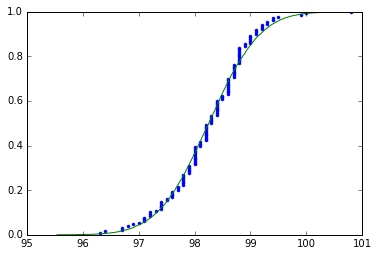

In [18]:
#plot theoretical normal cdf vs. cdf using our data.
plt.plot(x_data,y_data,marker='.',linestyle='none')
plt.plot(x_theor,y_theor)
plt.show()
#This shows that body temperatures are normally distributed 
#if we assume that the given sample is a representation of the overall popu;atopm

### Question 2: Is the sample size large? Are the observations independent?

Answer: Sample size of 130 is considered large for CLT to hold (needs n>30 for CLT to hold)

In [37]:
len(df) 

130

### Question 3: Is the true population mean really 98.6 degrees F? 

Use one-sample two-tailed hypothesis test because of how we set up our null and alternative hypothesis <br>
Null Hypothesis: The population mean = 98.6  
Alternative Hypothesis: The population mean != 98.6 <br>
Use t-test because we don't know the population standard deviation

Answer: Since the p-value is very small and less than a significance level say alpha=0.05, we reject the null hypothesis that the population mean is 98.6 in favor of the alternative hypothesis

In [24]:
#t-test
from scipy import stats
stats.ttest_1samp(df['temperature'], 98.6)
#based on the result, reject null hypothesis

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [30]:
#try z-test
import statsmodels.stats.weightstats as sm
sm.ztest(df.temperature, value= 98.6, ddof=1)
#the result of the z-test is very similar to the t-test. Reject null hypothesis

(-5.4548232923645195, 4.9021570141012155e-08)

### Question 4: At what temperature should we consider someone's temperature to be "abnormal"?

Answer: Outside the 95% Confidence Interval: (98.123679804428193, 98.374781734033363)

In [43]:
mean = np.mean(df['temperature'])
std = np.std(df['temperature'])
se = std/np.sqrt(len(df['temperature'])) #standard error
me = 1.96 * se #margin of error
ci = (mean-me,mean+me)

print('Margin of Error:',me)
print('95% Confidence Interval:',ci)

Margin of Error: 0.125550964803
95% Confidence Interval: (98.123679804428193, 98.374781734033363)


### Question 5: Is there a significant difference between males and females in normal temperature?

Use two sample t-test.
<br>Null Hypothesis: Population Mean Male Body Temperature = Population Mean Female Body Temperature
<br>Alternative Hypothesis: Population Mean Male Body Temperature != Population Mean Female Body Temperature

Answer: Since pvalue = 0.024, for alpha=0.05, we reject the null hypothesis that the two population means are equal in favor of the alternative hypothesis.

In [32]:
#separate male and female
df_male = df[df['gender']=='M']
df_female = df[df['gender']=='F']

In [44]:
stats.ttest_ind(df_male['temperature'], df_female['temperature'], equal_var=True)
#Since pvalue = 0.024, for alpha=0.05 > 0.024, we reject the null hypothesis

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)